In [26]:
#import dependencies
import pandas
import numpy
import hvplot.pandas
import matplotlib.pyplot as plt

#machine learning dependencies
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import StandardScaler, OneHotEncoder


#connection to db
from connect_sql_db import build_engine

# Polynomial Regression Model

In [2]:
#look into polynomial linear regression

# Neural Network Classifier 

In [36]:
engine = build_engine(database_name="database1",host="35.225.193.21")

In [37]:
cleaned_df = pandas.read_sql("select * from cleaned_table_2",con=engine)

In [38]:
cleaned_df["stars"] = cleaned_df.stars.apply(lambda x: int(x))

In [39]:
X = cleaned_df.drop(cleaned_df.dtypes[cleaned_df.dtypes == "object"].index.tolist(), axis = 1)

In [40]:
y = cleaned_df.stars
X = X.drop("stars", axis=1).values

In [41]:
y.value_counts()

4    2581
3    2395
2     431
1      50
5      43
Name: stars, dtype: int64

In [42]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    random_state = 1
)

In [43]:
X_scaler = StandardScaler()
X_scaler.fit(X_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

enc = OneHotEncoder()
enc.fit(y_train.values.reshape(-1, 1))
encoded_y_train = enc.transform(y_train.values.reshape(-1, 1)).toarray()
encoded_y_test = enc.transform(y_train.values.reshape(-1, 1)).toarray()

In [44]:
model = Sequential()

In [45]:
model.add(Dense(100, activation='relu', input_dim=X_train_scaled.shape[1]))

model.add(Dense(50, activation='relu'))

model.add(Dense(10, activation='relu'))

In [46]:
model.add(Dense(5, activation="softmax"))

In [47]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [48]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 100)               5000      
_________________________________________________________________
dense_5 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_6 (Dense)              (None, 10)                510       
_________________________________________________________________
dense_7 (Dense)              (None, 5)                 55        
Total params: 10,615
Trainable params: 10,615
Non-trainable params: 0
_________________________________________________________________


In [49]:
fit_model = model.fit(
    X_train_scaled,
    encoded_y_train,
    epochs=100,
    shuffle=True,
    verbose=2
)

Epoch 1/100
129/129 - 0s - loss: 1.0718 - accuracy: 0.5353
Epoch 2/100
129/129 - 0s - loss: 0.8954 - accuracy: 0.5901
Epoch 3/100
129/129 - 0s - loss: 0.8649 - accuracy: 0.6032
Epoch 4/100
129/129 - 0s - loss: 0.8441 - accuracy: 0.6250
Epoch 5/100
129/129 - 0s - loss: 0.8225 - accuracy: 0.6250
Epoch 6/100
129/129 - 0s - loss: 0.8062 - accuracy: 0.6356
Epoch 7/100
129/129 - 0s - loss: 0.7922 - accuracy: 0.6470
Epoch 8/100
129/129 - 0s - loss: 0.7754 - accuracy: 0.6519
Epoch 9/100
129/129 - 0s - loss: 0.7617 - accuracy: 0.6625
Epoch 10/100
129/129 - 0s - loss: 0.7453 - accuracy: 0.6737
Epoch 11/100
129/129 - 0s - loss: 0.7325 - accuracy: 0.6781
Epoch 12/100
129/129 - 0s - loss: 0.7171 - accuracy: 0.6875
Epoch 13/100
129/129 - 0s - loss: 0.7023 - accuracy: 0.6979
Epoch 14/100
129/129 - 0s - loss: 0.6922 - accuracy: 0.7045
Epoch 15/100
129/129 - 0s - loss: 0.6842 - accuracy: 0.7028
Epoch 16/100
129/129 - 0s - loss: 0.6649 - accuracy: 0.7227
Epoch 17/100
129/129 - 0s - loss: 0.6497 - accura

In [50]:
# Make predictions
predicted = model.predict(X_test_scaled)
predicted = enc.inverse_transform(predicted).flatten().tolist()
results = pandas.DataFrame({
    "Actual": y_test,
    "Predicted": predicted
})
results.head(10)

,Actual,Predicted
4410,4,4
2256,3,3
3684,4,4
4706,4,4
5429,4,4
1825,4,3
3408,3,3
4306,2,2
386,3,4
1751,4,2


In [51]:
print(classification_report(results.Actual, results.Predicted))

              precision    recall  f1-score   support

           1       0.30      0.20      0.24        15
           2       0.27      0.28      0.28        94
           3       0.55      0.57      0.56       612
           4       0.59      0.58      0.58       645
           5       0.00      0.00      0.00         9

    accuracy                           0.54      1375
   macro avg       0.34      0.32      0.33      1375
weighted avg       0.54      0.54      0.54      1375



<AxesSubplot:>

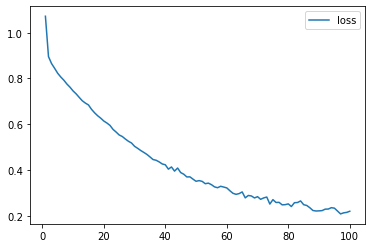

In [52]:
#testing
result_df = pandas.DataFrame(
    fit_model.history,
    index = range(1, len(fit_model.history["loss"]) + 1)
)

result_df.plot(y="loss")

<AxesSubplot:>

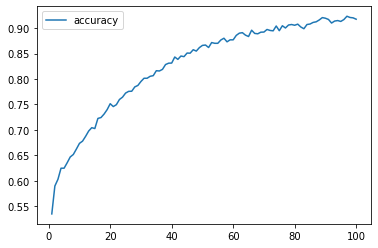

In [53]:
#testing
result_df = pandas.DataFrame(
    fit_model.history,
    index = range(1, len(fit_model.history["accuracy"]) + 1)
)

result_df.plot(y="accuracy")